In [1]:
import warnings
warnings.filterwarnings('ignore')

from analysis_phangs_hst import dendro_cutouts, dendro_dendro, dendro_misc, dendro_props, dendro_plot, dendro_mask

In [2]:
# Get Galaxy properties
galaxy = 'ngc0628'
min_value_sig = [2, 3, 4, 5]

sampletable = dendro_dendro.get_GalaxyProps(galaxy)
muscat_table = dendro_dendro.get_MuseProps(galaxy)

hdus = dendro_misc.load_pickle('../../analysis/catalogue/hdus_sample_sci.pickel')

[INFO] [get_GalaxyProps] Getting sample table properties for ngc0628...
[INFO] [get_MuseProps] Getting MUSE catalouge properties for ngc0628...
[INFO] [load_pickle] Load ../../analysis/catalogue/hdus_sample_sci.pickel


In [3]:
# Specify the regions file
regions_file = './../../analysis/catalogue/sample_v2.reg'

# Call the get_regions function to retrieve the region properties with a progress bar
regions = dendro_cutouts.get_regions(regions_file, hdus['hst07_hdus'])

# Call the process_regions function and store the returned values
hdus, muscat_ids = dendro_dendro.get_maskedhdus(hdus, regions)

[INFO] [get_regions] Opening regions file (this may take a min)... 
[INFO] [get_regions] Getting info for 215 regions...
[INFO] [get_maskedhdus] Getting HST maps masked by MUSE catalouge...


Masking regions:   0%|          | 0/215 [00:00<?, ?it/s]

In [11]:
# Using the `get_dedro_all_decorator` function from the `dendro_dendro` module,
# process the given HDUs to extract dendrogram properties based on the minimum
# value significance (`min_value_sig`), the sample table (`sampletable`), 
# and the MUSCAT IDs (`muscat_ids`). This will return the processed HDUs and the
# extracted dendrogram properties for each HDU.
hdus, props_all = dendro_dendro.get_dedro_all_decorator(hdus, min_value_sig, sampletable, muscat_ids)

# Augment the extracted dendrogram properties (`props_all`) with additional 
# information from the MUSCAT table (`muscat_table`) using the `add_muse_info`
# function from the `dendro_dendro` module.
props_all = dendro_dendro.add_muse_info(props_all, muscat_table)

for key in props_all.keys():
    props_all[key]['flux_corr'] = dendro_props.correct_ha_flux(props_all[key]['flux'], props_all[key])
    props_all[key]['ha_lum_hst'] = dendro_props.calculate_luminosity(props_all[key]['flux_corr']*1e-20, props_all[key]['dist_pc'])
    
dendro_misc.save_pickle(hdus, '../../analysis/catalogue/hdus_sample_withdendro.pickel') 
dendro_misc.save_pickle(props_all, '../../analysis/dendro/props_all/01_props_all_allsig.pickel')        
dendro_dendro.save_fits(props_all)

[INFO] [save_pickle] Saved to ../../analysis/catalogue/hdus_sample_withdendro.pickel
[INFO] [save_pickle] Saved to ../../analysis/dendro/props_all/01_props_all_allsig.pickel
[INFO] [save_fits] Saved to ../../analysis/dendro/props_all/01_props_all_2sig.fits
[INFO] [save_fits] Saved to ../../analysis/dendro/props_all/01_props_all_3sig.fits
[INFO] [save_fits] Saved to ../../analysis/dendro/props_all/01_props_all_4sig.fits
[INFO] [save_fits] Saved to ../../analysis/dendro/props_all/01_props_all_5sig.fits


Dendrogram (with sigma ranges):   0%|          | 0/215 [00:00<?, ?it/s]

KeyboardInterrupt: 

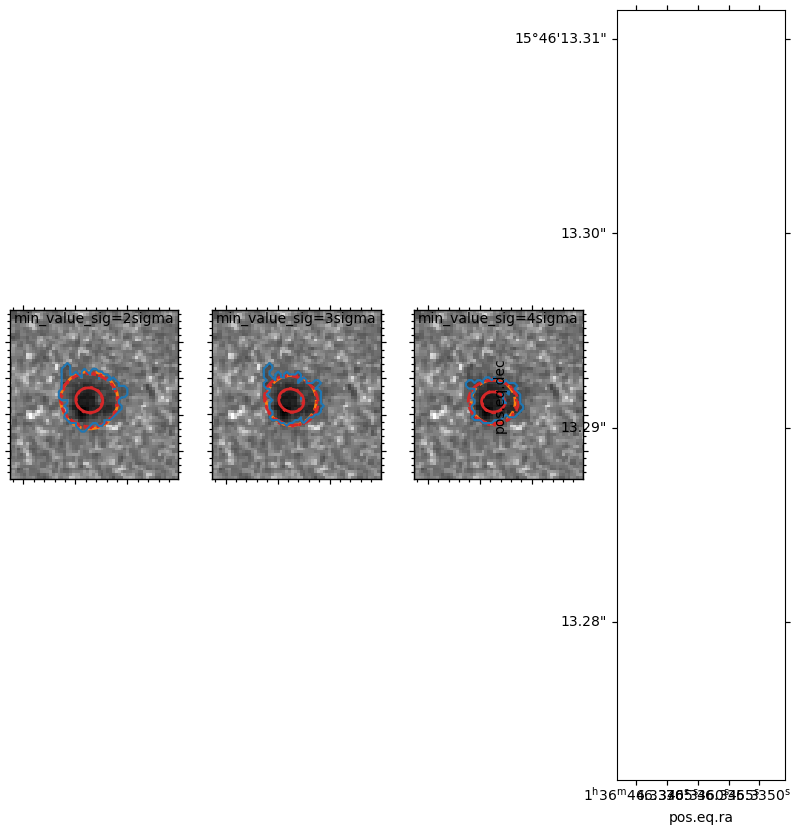

In [8]:
# Using the `plot_sigmacomp_decorator` function from the `dendro_dendro_plot` module,
# plot a sigma comparison based on the provided HDUs, dendrogram properties (`props_all`), 
# regions, region ID (`regionID`), and minimum value significance (`min_value_sig`).
dendro_dendro_plot.plot_sigmacomp_decorator(hdus, props_all, regions, min_value_sig)